# Load Preprocessed Data

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("processed_data.csv") # reading the preprocessed csv file into "df"
df.head()

,pizza_id,order_id,pizza_name_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Year,Month,Day,Hour,Minute,Second,Items_Qty_In_Grams
0,0,0,27,1,13.25,13.25,1,1,55,12,2015,1,1,11,38,36,33.402357
1,0,0,27,1,13.25,13.25,1,1,46,12,2015,1,1,11,38,36,30.000000
2,0,0,27,1,13.25,13.25,1,1,36,12,2015,1,1,11,38,36,20.000000
3,96,40,54,1,16.50,16.50,1,2,26,19,2015,1,1,17,28,9,60.000000
4,96,40,54,1,16.50,16.50,1,2,13,19,2015,1,1,17,28,9,100.000000


# Exploratory Data Analysis (EDA)

In [3]:
df.shape    # shape of the dataframe

(249779, 17)

In [4]:
df.info()   # dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249779 entries, 0 to 249778
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pizza_id            249779 non-null  int64  
 1   order_id            249779 non-null  int64  
 2   pizza_name_id       249779 non-null  int64  
 3   quantity            249779 non-null  int64  
 4   unit_price          249779 non-null  float64
 5   total_price         249779 non-null  float64
 6   pizza_size          249779 non-null  int64  
 7   pizza_category      249779 non-null  int64  
 8   pizza_ingredients   249779 non-null  int64  
 9   pizza_name          249779 non-null  int64  
 10  Year                249779 non-null  int64  
 11  Month               249779 non-null  int64  
 12  Day                 249779 non-null  int64  
 13  Hour                249779 non-null  int64  
 14  Minute              249779 non-null  int64  
 15  Second              249779 non-nul

In [5]:
df.describe()   # statistical description of the dataframe

,pizza_id,order_id,pizza_name_id,quantity,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Year,Month,Day,Hour,Minute,Second,Items_Qty_In_Grams
count,249779.000000,249779.000000,249779.000000,249779.0,249779.000000,249779.000000,249779.000000,249779.000000,249779.000000,249779.000000,249779.0,249779.000000,249779.000000,249779.000000,249779.000000,249779.000000,249779.000000
mean,23811.857098,10638.025819,42.719912,1.0,16.723497,16.723497,0.924517,1.573379,36.954688,15.826346,2015.0,6.433900,15.492431,15.940912,29.608406,29.519603,28.515161
std,13758.381917,6152.328240,27.212289,0.0,3.465969,3.465969,0.831505,1.141359,17.587004,9.535464,0.0,3.439301,8.788317,3.148914,17.315052,17.222862,22.831920
min,0.000000,0.000000,0.000000,1.0,9.750000,9.750000,0.000000,0.000000,0.000000,0.000000,2015.0,1.000000,1.000000,9.000000,0.000000,0.000000,5.000000
25%,11897.000000,5296.000000,19.000000,1.0,12.750000,12.750000,0.000000,1.000000,25.000000,7.000000,2015.0,3.000000,8.000000,13.000000,15.000000,15.000000,12.500000
50%,23794.000000,10608.000000,41.000000,1.0,16.500000,16.500000,1.000000,2.000000,37.000000,16.000000,2015.0,6.000000,15.000000,16.000000,29.000000,30.000000,20.000000
75%,35735.000000,16015.000000,67.000000,1.0,20.250000,20.250000,2.000000,3.000000,52.000000,25.000000,2015.0,9.000000,23.000000,18.000000,45.000000,44.000000,40.000000
max,47628.000000,21239.000000,89.000000,1.0,25.500000,25.500000,3.000000,3.000000,63.000000,31.000000,2015.0,12.000000,31.000000,23.000000,59.000000,59.000000,120.000000


In [6]:
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])  # create new "date" column

df.set_index('date', inplace=True)  # set "date" as index of the df

df.sort_index(inplace=True)   # sort index based on the index

df['day_of_week'] = df.index.dayofweek    # create day_of_week column

# Identify Weekends
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)

# Visualization

Visualize daily sales trend

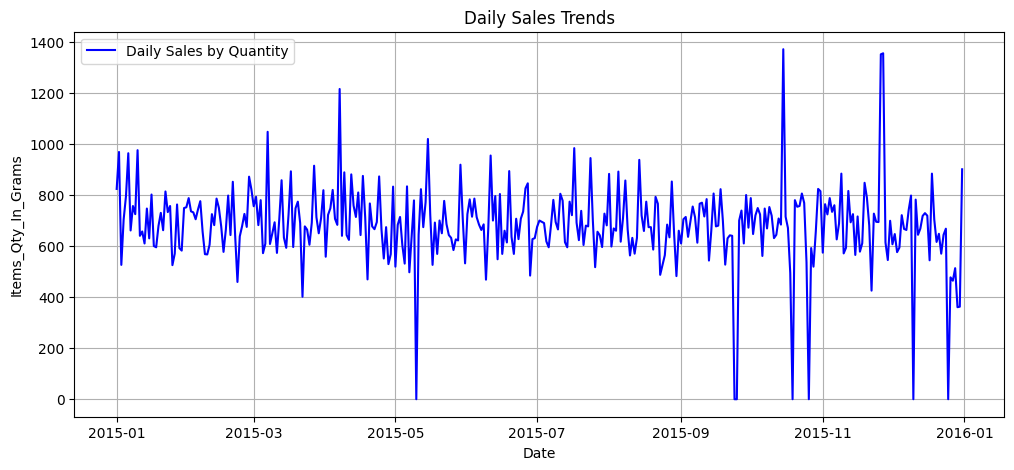

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by day (sum of sales per day)
df_daily = df.resample('D').sum()  # 'D' = daily
plt.figure(figsize=(12, 5))
plt.plot(df_daily.index, df_daily['quantity'], label="Daily Sales by Quantity", color="blue")
plt.title("Daily Sales Trends")
plt.xlabel("Date")
plt.ylabel("Items_Qty_In_Grams")
plt.legend()
plt.grid()
plt.show()

Analyze Seasonality (Month and Day of Week)

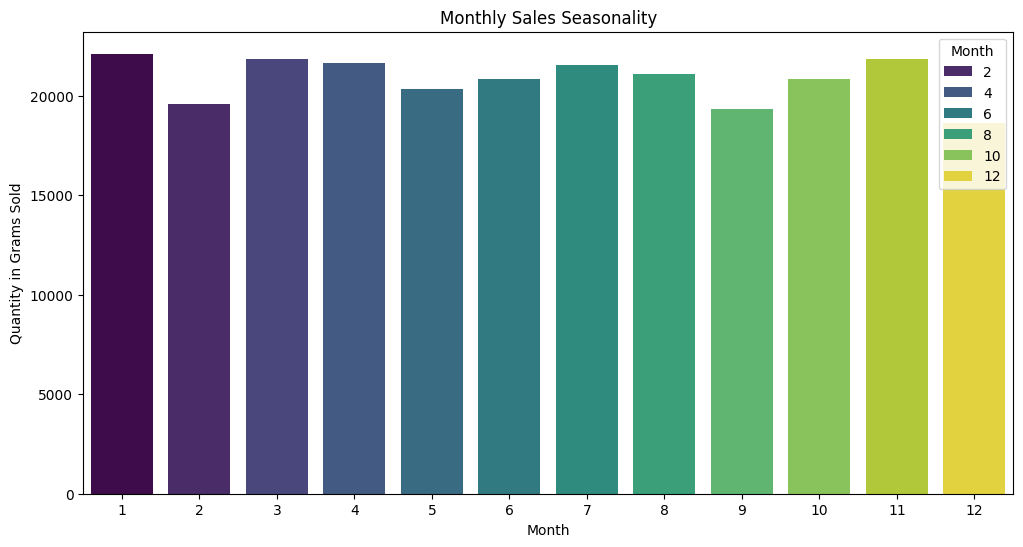

In [11]:
# Monthly sales analysis
monthly_sales = df.groupby('Month')['quantity'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis", hue=monthly_sales.index)
plt.title("Monthly Sales Seasonality")
plt.xlabel("Month")
plt.ylabel("Quantity in Grams Sold")
plt.show()

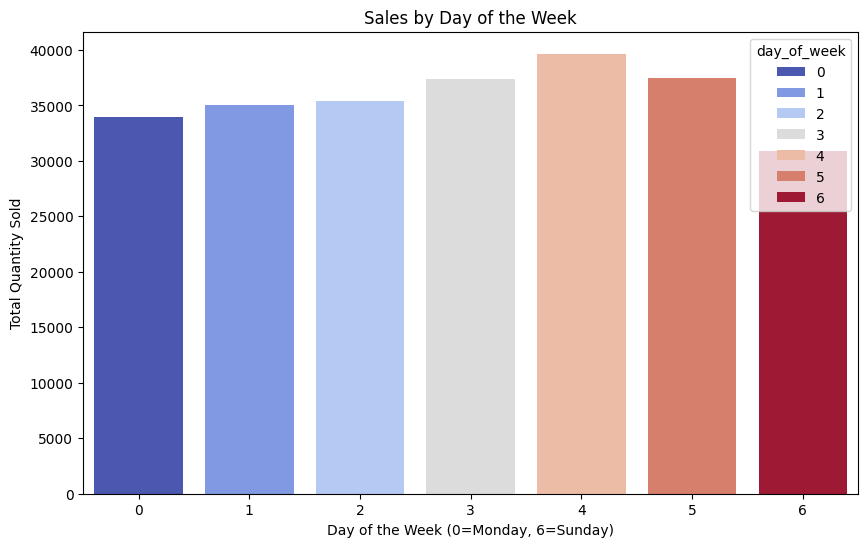

In [12]:
# Day of the week sales analysis
weekday_sales = df.groupby('day_of_week')['quantity'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm", hue=weekday_sales.index)
plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Total Quantity Sold")
plt.show()

Analyze Patterns (Weekends vs. Weekdays)

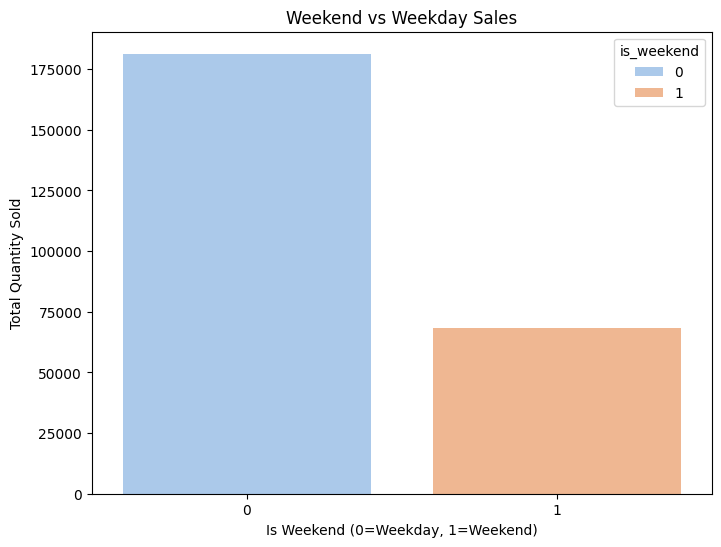

In [13]:
# Compare sales on weekends vs weekdays
weekend_sales = df.groupby('is_weekend')['quantity'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=weekend_sales.index, y=weekend_sales.values, palette="pastel", hue=weekend_sales.index)
plt.title("Weekend vs Weekday Sales")
plt.xlabel("Is Weekend (0=Weekday, 1=Weekend)")
plt.ylabel("Total Quantity Sold")
plt.show()

Analyze Category-Wise Sales

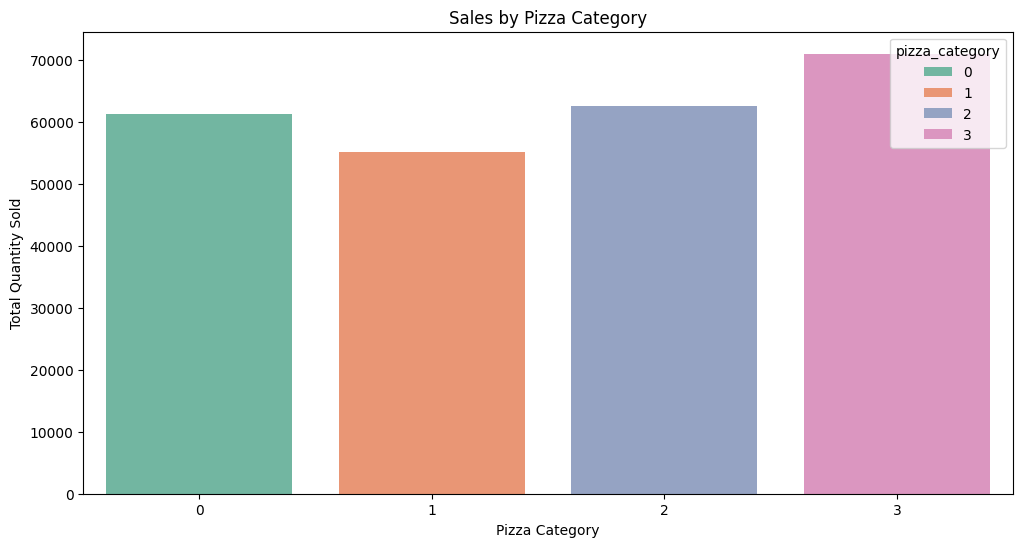

In [14]:
category_sales = df.groupby('pizza_category')['quantity'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="Set2", hue=category_sales.index)
plt.title("Sales by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Quantity Sold")
plt.show()

Top 10 Ingredients by Total Quantity Used

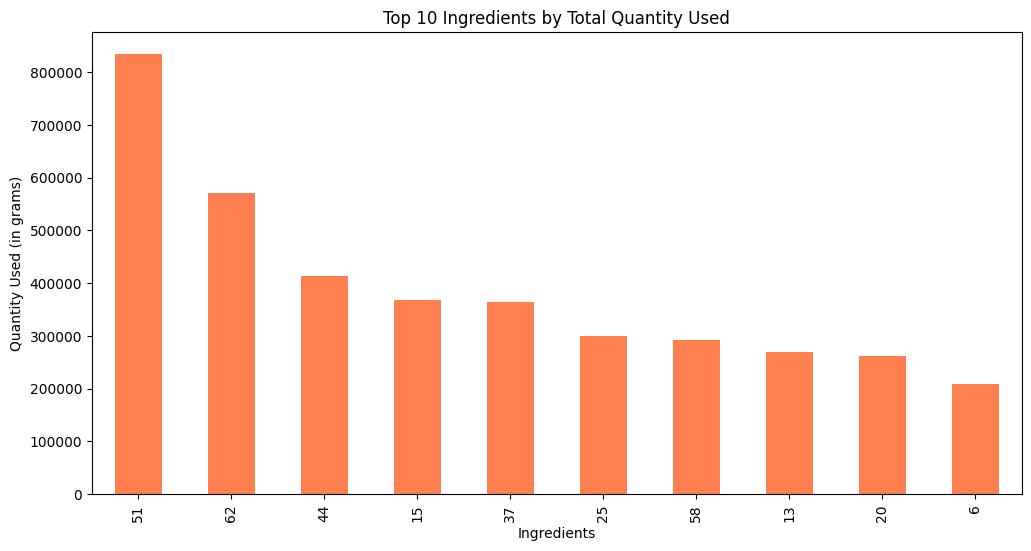

In [15]:
ingredient_usage = df.groupby('pizza_ingredients')['Items_Qty_In_Grams'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ingredient_usage[:10].plot(kind='bar', color='coral')
plt.title("Top 10 Ingredients by Total Quantity Used")
plt.xlabel("Ingredients")
plt.ylabel("Quantity Used (in grams)")
plt.show()

Mointhly sales of Quantity in Grams

<ipython-input-16-e99305a77b3f>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()  # 'M' = monthly


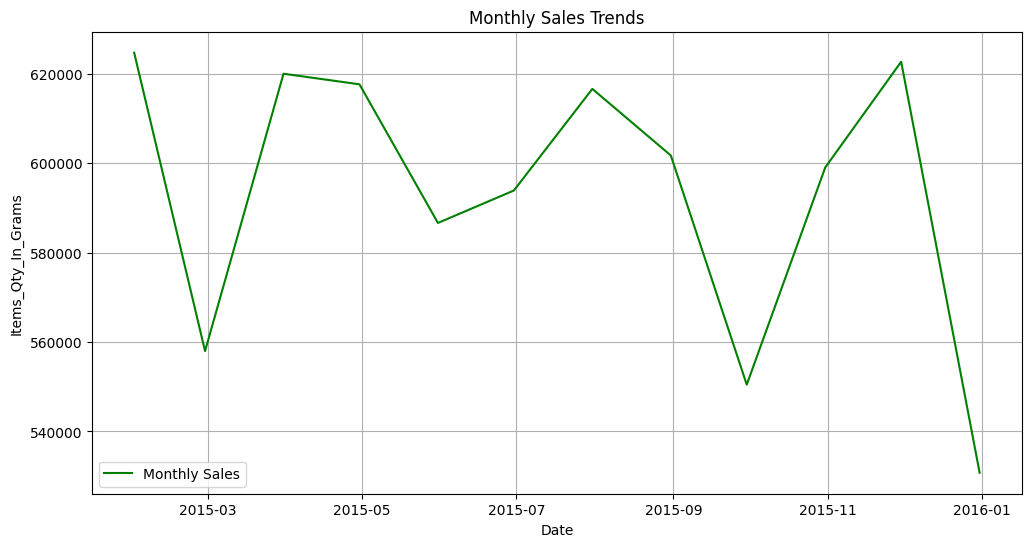

In [16]:
# Aggregate by month
df_monthly = df.resample('M').sum()  # 'M' = monthly
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['Items_Qty_In_Grams'], label="Monthly Sales", color="green")
plt.title("Monthly Sales Trends")
plt.xlabel("Date")
plt.ylabel("Items_Qty_In_Grams")
plt.legend()
plt.grid()
plt.show()


In [17]:
df.to_csv('processed_data.csv')